In [6]:
import pandas as pd
creat = pd.read_csv('../data/intermediate/creatinine_lev_all.csv')
creat.columns=['patientunitstayid', 'labresult', 'labresultoffset']

In [7]:
creat.sort_values(by=['patientunitstayid', 'labresultoffset'], inplace=True)
len(creat.patientunitstayid.unique())

170000

In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src/'))
import aki_label
import importlib

In [8]:
importlib.reload(aki_label)
creat, aki_onset = aki_label.creat_label_timeoffset(creat)

(-10.0, 20.0)

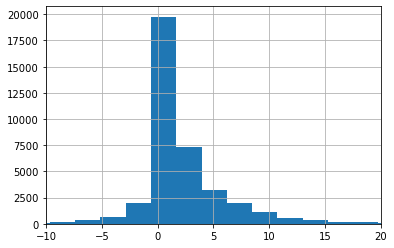

In [21]:
import matplotlib.pyplot as plt
(aki_onset['earlier_time']/(60*24)).hist(bins=100)
plt.xlim(-10, 20)

In [14]:
len(aki_onset)

38558

In [22]:
38558/170000

0.22681176470588235

~ 20% occurences matches the reports in literature.

In [23]:
# merge the earliest times to creat table and get the unique patient IDs with early onsets
creat.set_index('patientunitstayid', inplace=True)
creat = creat.merge(aki_onset, how='left', left_index=True, right_index=True)

In [27]:
creat.reset_index(inplace=True)
pat_id_offset = creat.groupby('patientunitstayid')['earlier_time'].mean()

In [28]:
pat_id_offset

patientunitstayid
141168     2026.0
141194        NaN
141197        NaN
141203        1.0
141208        NaN
            ...  
3353235       NaN
3353237       NaN
3353251     409.0
3353254       NaN
3353263       NaN
Name: earlier_time, Length: 170000, dtype: float64

In [29]:
len(pat_id_offset)

170000

In [30]:
pat_id_offset.to_csv('../data/intermediate/id_offset.csv')